$\textbf{PROGRAMMING ASSIGNMENT - Lecture 1}$
---

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot
2. Check the distribution of each column and determine which probability distribution it fits.
3. Create a summary statistics.
4. Perform a hypothesis test (Code from scratch).

---

Data: [Occupancy Detection](https://archive.ics.uci.edu/dataset/357/occupancy+detection)

In [88]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from scipy import stats

In [89]:
occupancy_detection = fetch_ucirepo(id=357)
occupancy_detection.variables

,name,role,type,demographic,description,units,missing_values
0,id,ID,Integer,None,None,None,no
1,date,Feature,Date,None,None,None,no
2,Temperature,Feature,Integer,None,None,C,no
3,Humidity,Feature,Continuous,None,None,%,no
4,Light,Feature,Integer,None,None,Lux,no
5,CO2,Feature,Continuous,None,None,ppm,no
6,HumidityRatio,Feature,Continuous,None,None,kgwater-vapor/kg-air,no
7,Occupancy,Target,Binary,None,"0 for not occupied, 1 for occupied status",None,no


In [90]:
occupancy_detection.data.features

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518
...,...,...,...,...,...,...
20557,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.00421296819328694
20558,2015-02-18 09:16:00,20.865,27.745,423.5,1514.5,0.00423026193160229
20559,2015-02-18 09:16:59,20.89,27.745,423.5,1521.5,0.00423681810140671
20560,2015-02-18 09:17:59,20.89,28.0225,418.75,1632,0.0042794854718673


In [91]:
occupancy_detection.data.targets

,Occupancy
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
20557,1.0
20558,1.0
20559,1.0
20560,1.0


In [92]:
numeric_features = occupancy_detection.data.features.drop(columns=['date'])
numeric_features = numeric_features.apply(lambda col : pd.to_numeric(col, errors='coerce'))

df = numeric_features.join(occupancy_detection.data.targets)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 0 to 20561
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [93]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [94]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1.0
1,23.15,27.2675,429.5,714.00,0.004783,1.0
2,23.15,27.2450,426.0,713.50,0.004779,1.0
3,23.15,27.2000,426.0,708.25,0.004772,1.0
4,23.10,27.2000,426.0,704.50,0.004757,1.0


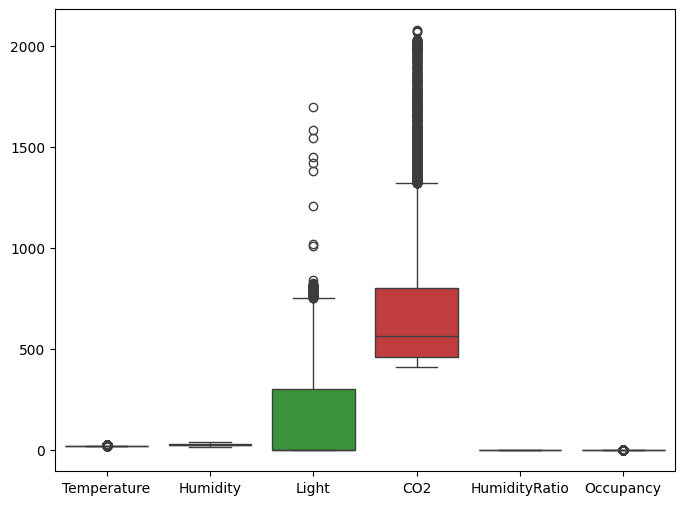

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.show()

### $\textbf{Correlation Plot}$

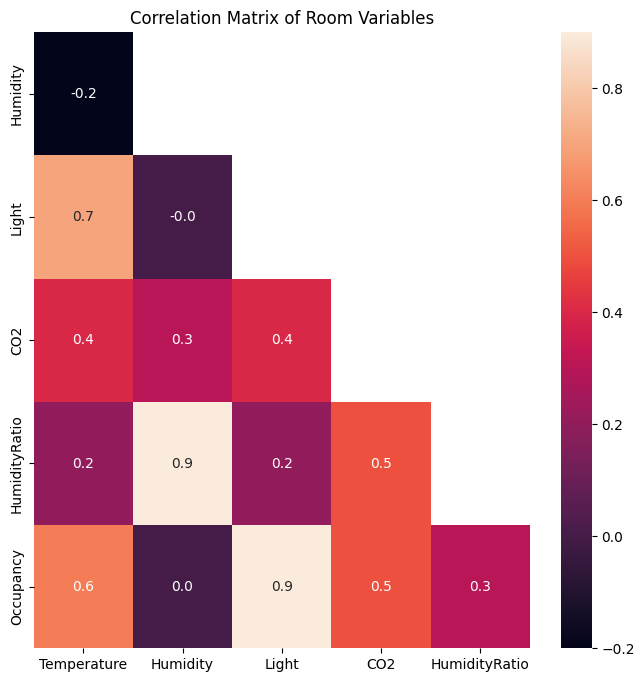

In [96]:
corr = df.corr().round(1)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

viz = corr.mask(mask).dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix of Room Variables')
sns.heatmap(viz, annot=True, fmt=".1f")
plt.show()

### $\textbf{Distribution Fitting Visualization}$

`Occupancy` column is ignored, since it should fit the Binary (Bernoulli) Distribution, as it only encompasses a binary value of `0 (not occupied)`, and `1 (occupied)`. 

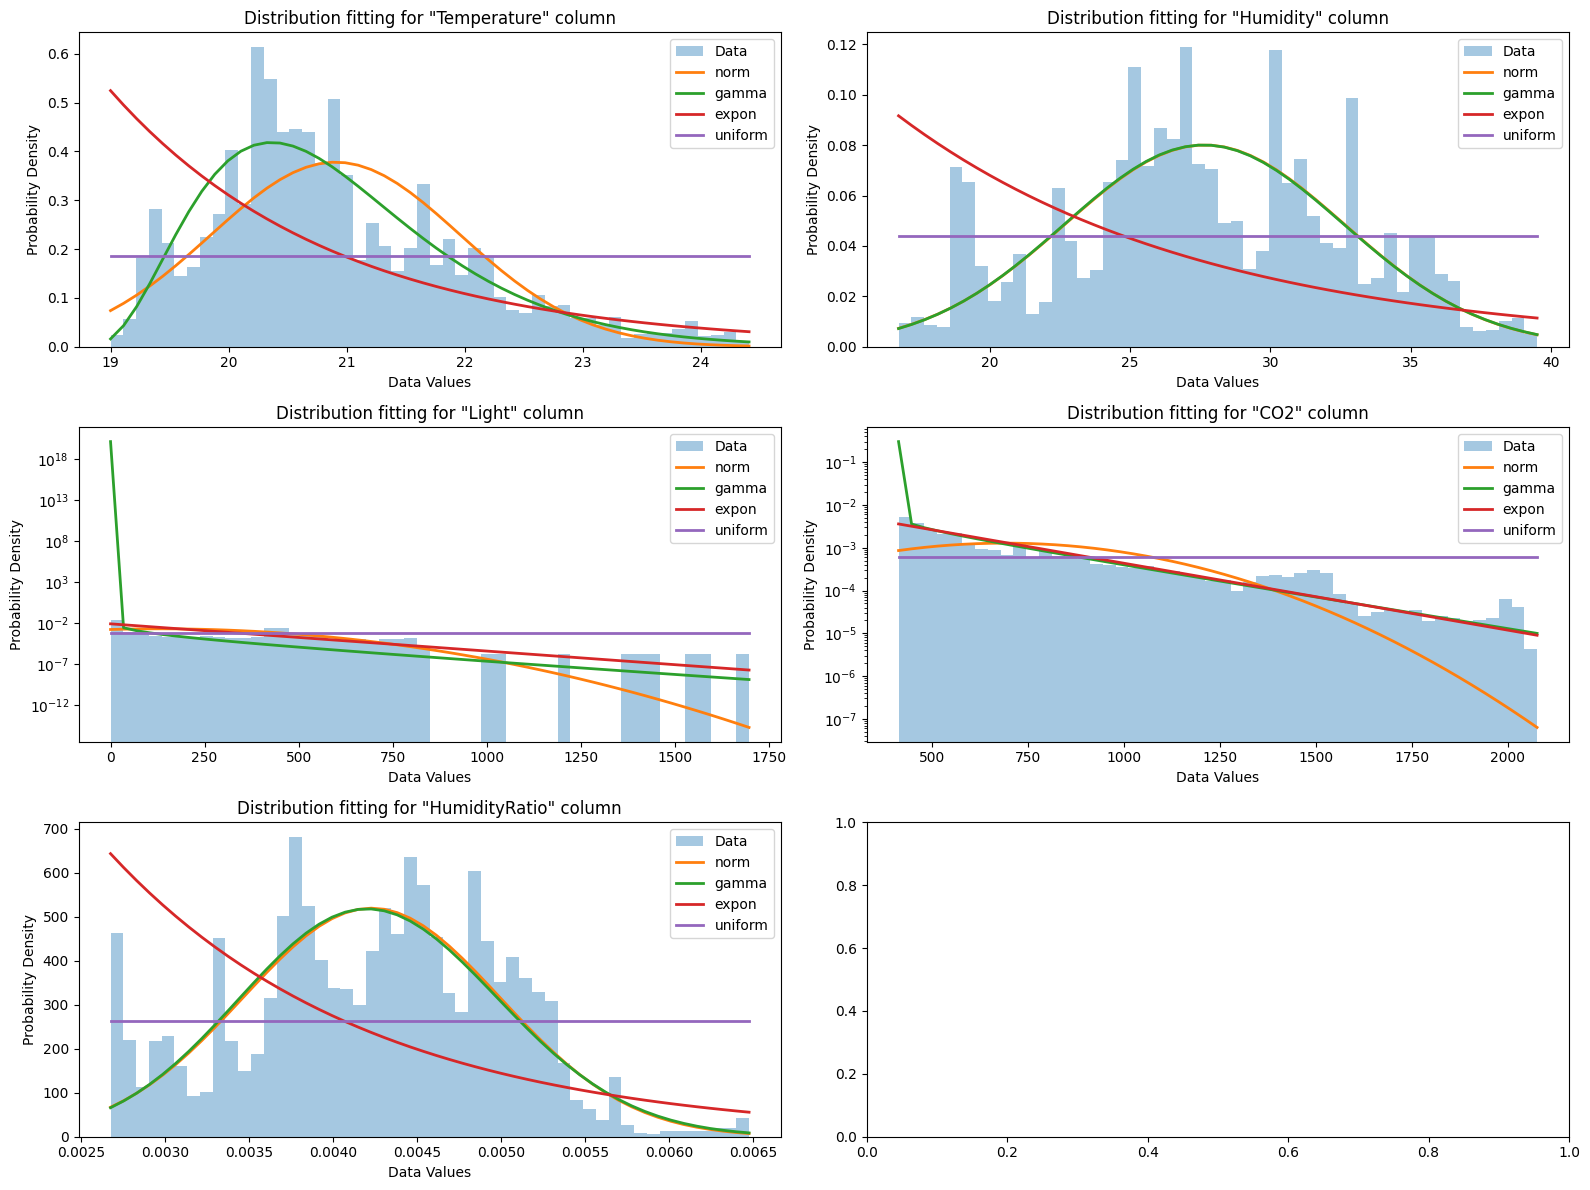

In [97]:
continuous_dist = [stats.norm, stats.gamma, stats.expon, stats.uniform]
best_fit_dist = {}

subplot_cols = 2
subplot_rows = (len(df.columns) - 1) // subplot_cols + 1
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(16, 12))

for i, column in enumerate(df.columns):
    if column == 'Occupancy':
        continue

    data = df[column]

    row = i // subplot_cols
    col = i % subplot_cols
    ax = axes[row, col] if subplot_rows > 1 else axes[col]

    ax.set_title(f'Distribution fitting for "{column}" column')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')

    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data')
    if column in ['Light', 'CO2']:
        ax.set_yscale('log')

    best_fit_stat = np.inf
    best_fit_dist[column] = None

    x = np.linspace(data.min(), data.max())
    for dist in continuous_dist:
        params = dist.fit(data)
        pdf = dist.pdf(x, *params)
        test = stats.kstest(data, dist.cdf, args=params)

        if test.statistic < best_fit_stat:
            best_fit_stat = test.statistic
            best_fit_dist[column] = dist

        ax.plot(x, pdf, lw=2, label=dist.name)

    ax.legend()

plt.tight_layout()
plt.show()

`Kolmogorov-Smirnov Test (K-S Test) for Goodness-of-Fit` is used to check the best fit distribution for the given columns. It is utilized as it is widely used as a non-parametric test due to its ability to compare the empirical cumulative distribution function (CDF) of the observed data with the theoretical CDF of the fitted distribution. Its non-parametric nature allows for robust assessment of goodness-of-fit without assuming a specific distributional form, making it applicable across a wide range of scenarios.

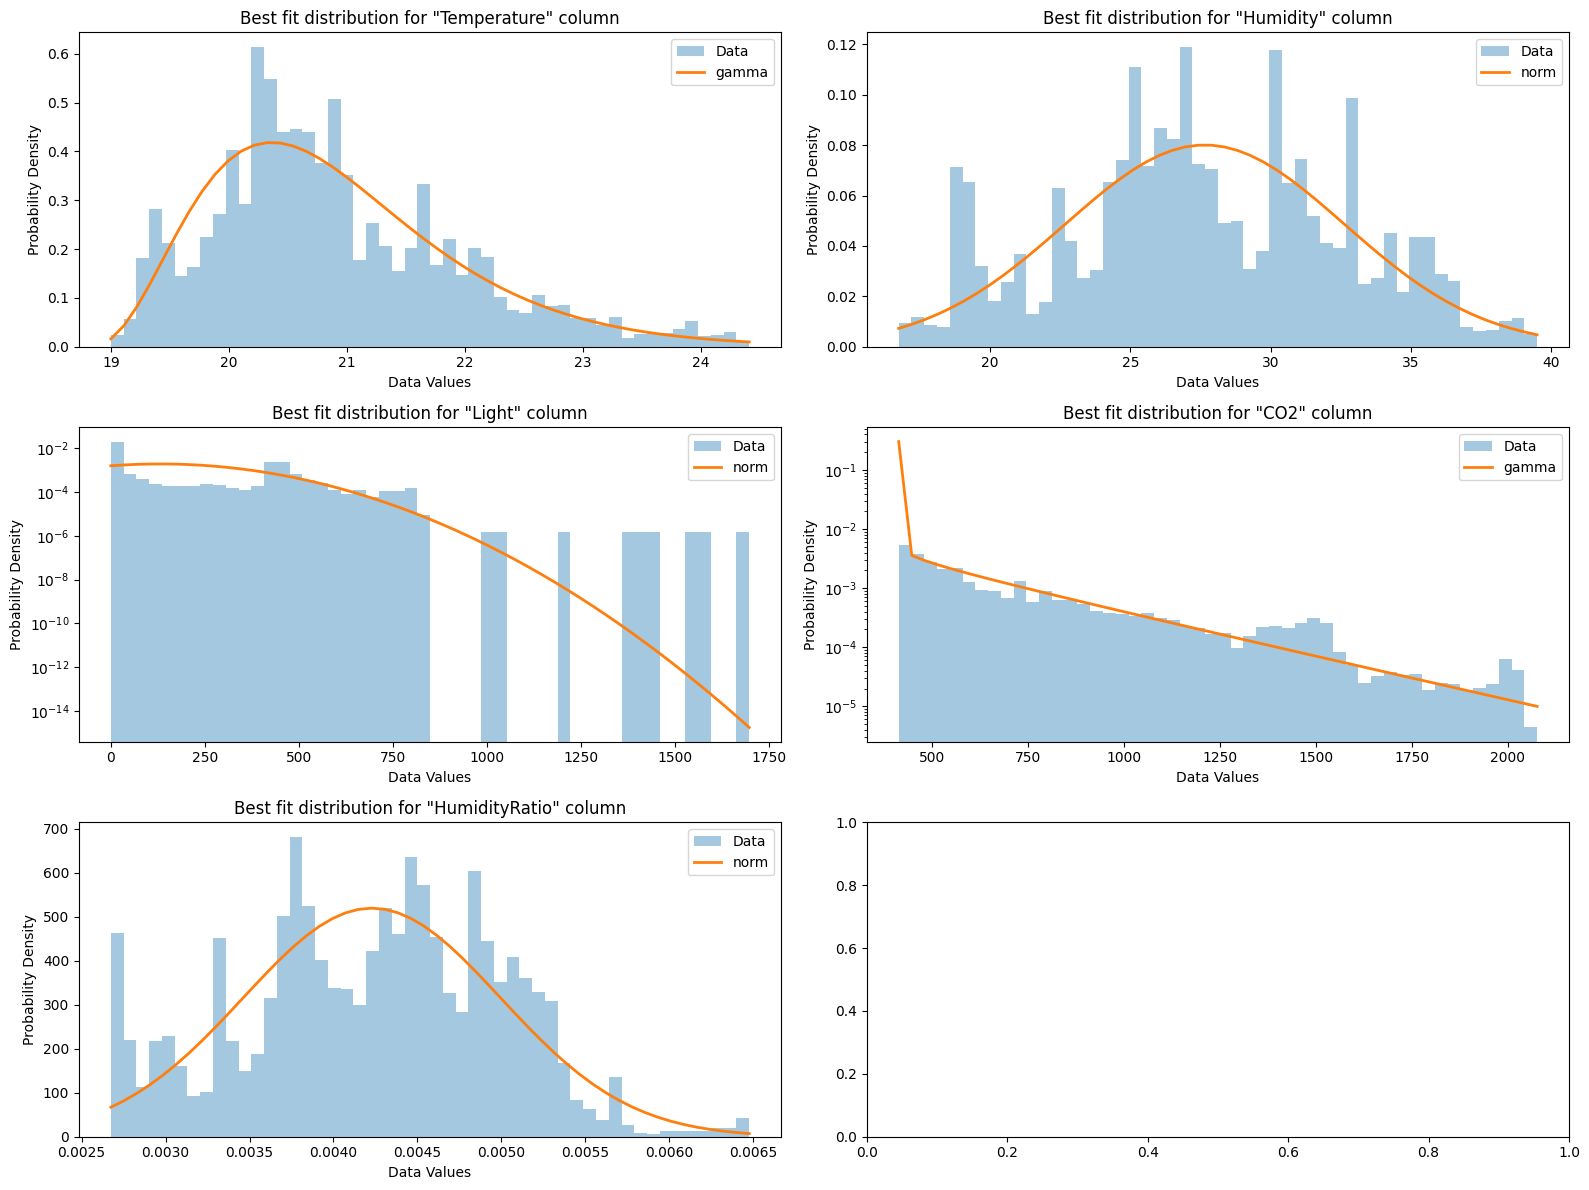

In [98]:
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(16, 12))

for i, (column, dist) in enumerate(best_fit_dist.items()):
    data = df[column]

    row = i // subplot_cols
    col = i % subplot_cols
    ax = axes[row, col] if subplot_rows > 1 else axes[col]

    ax.set_title(f'Best fit distribution for "{column}" column')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')

    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data')
    if column in ['Light', 'CO2']:
        ax.set_yscale('log')

    x = np.linspace(data.min(), data.max())
    params = dist.fit(data)
    pdf = dist.pdf(x, *params)

    ax.plot(x, pdf, lw=2, label=dist.name)
    ax.legend()

plt.tight_layout()
plt.show()

### $\textbf{Summary Statistics}$

In [99]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


### $\textbf{Hypothesis Test}$

$H_0 = \text{There is no significant difference in light when a room is occupied and when it is not.}$ <br>
$H_1 = \text{There is a significant difference in light when a room is occupied and when it is not.}$

`Test`: Unpaired T-Test (2-tailed) <br>
Target significance level: $\alpha = 0.01$

Assumptions Satisfied:
- The groups are independent. <br>
- The variables are interval scaled (as seen from previous graphs). <br>
- The variables are normally distributed (as seen below).

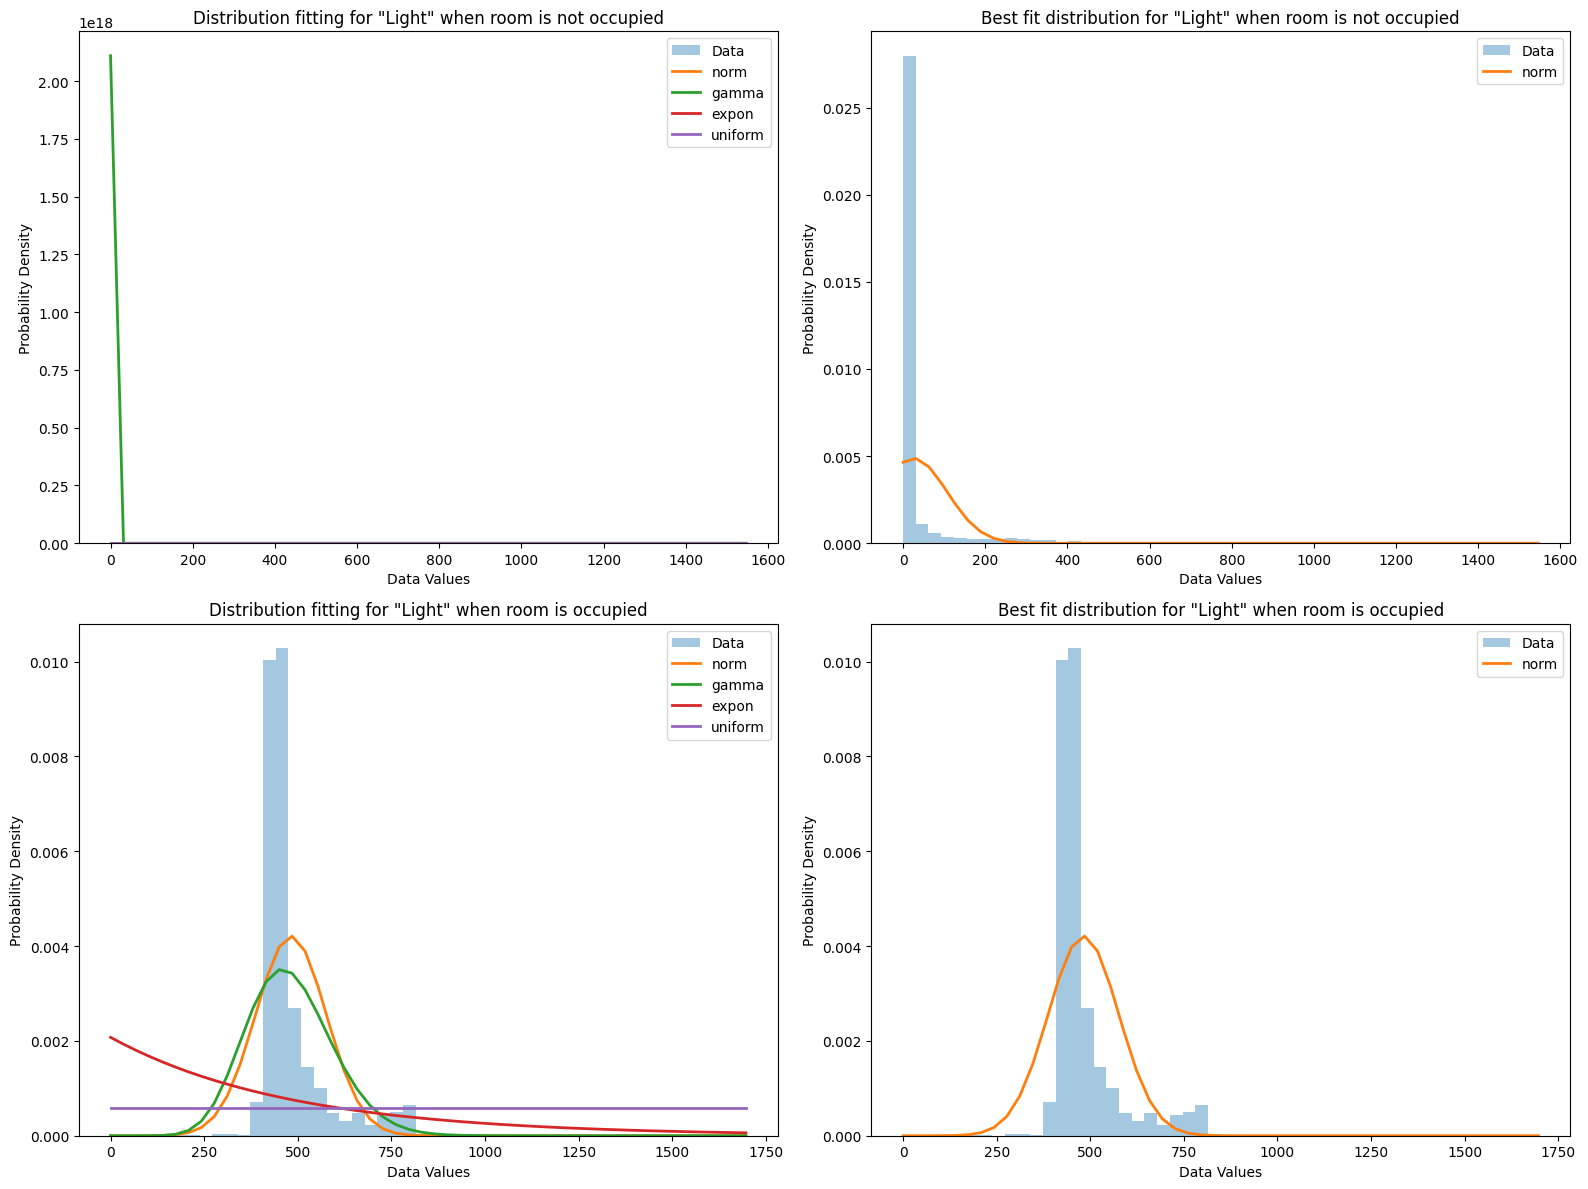

In [100]:
continuous_dist = [stats.norm, stats.gamma, stats.expon, stats.uniform]

column = "Light"
subplot_cols = 2
subplot_rows = 2
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(16, 12))

for i in range(0, 4, 2):
    data = df[df["Occupancy"] == i // subplot_rows][column]
    x = np.linspace(data.min(), data.max())

    best_fit_stat = np.inf
    best_fit_dist = None

    row = i // subplot_cols
    col = i % subplot_cols
    ax = axes[row, col]

    ax.set_title(f'Distribution fitting for "{column}" when {"room is occupied" if i // subplot_rows == 1 else "room is not occupied"}')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')
    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data')

    for dist in continuous_dist:
        params = dist.fit(data)
        pdf = dist.pdf(x, *params)
        test = stats.kstest(data, dist.cdf, args=params)

        if test.statistic < best_fit_stat:
            best_fit_stat = test.statistic
            best_fit_dist = dist

        ax.plot(x, pdf, lw=2, label=dist.name)
    ax.legend()

    ax = axes[row, col + 1]
    ax.set_title(f'Best fit distribution for "{column}" when {"room is occupied" if i // subplot_rows == 1 else "room is not occupied"}')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')
    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data')

    params = best_fit_dist.fit(data)
    pdf = best_fit_dist.pdf(x, *params)

    ax.plot(x, pdf, lw=2, label=best_fit_dist.name)
    ax.legend()

plt.tight_layout()
plt.show()

In [101]:
light_not_occupied = df[df["Occupancy"] == 0]["Light"]
light_occupied = df[df["Occupancy"] == 1]["Light"]

_, p_value = stats.levene(light_not_occupied, light_occupied)

if p_value > 0.05:
    print("Variance between the samples of light of an unoccupied room and occupied room is equal (homogenous)")
else:
    print("Variance between the samples of light of an unoccupied room and occupied room is not equal (heterogenous)")

Variance between the samples of light of an unoccupied room and occupied room is not equal (heterogenous)


In [102]:
# Variance is homogenous, use equal variance formula
s1 = light_occupied.std()
s2 = light_not_occupied.std()
x1 = light_occupied.mean()
x2 = light_not_occupied.mean()
n1 = len(light_occupied)
n2 = len(light_not_occupied)

estimated_value_for_std = np.sqrt((((n1 - 1) * (s1 ** 2)) + ((n2 - 1) * (s2 ** 2))) / (n1 + n2 - 2))
std_of_mean_value_diff = estimated_value_for_std * np.sqrt((1 / n1) + (1 / n2))
t_value = (x1 - x2) / std_of_mean_value_diff

df = n1 + n2 - 2

# Tried to look for a way to calculate the p_value by hand, but the world is hiding it from me
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))
significance_level = 0.01

if p_value > significance_level:
    print("Accept null hypothesis.")
    print("There is no significant difference in light when room is occupied and when it is not.")
else:
    print("Reject null hypothesis.")
    print("There is a significant difference in light when room is occupied and when it is not.")

Reject null hypothesis.
There is a significant difference in light when room is occupied and when it is not.
